In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.utils import np_utils
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:

data = pd.read_csv('/content/drive/MyDrive/MLSP/MLSP_Project/fer2013/fer2013.csv')

x_data_train = data[data["Usage"]=="Training"]['pixels']
y_data_train = data[data["Usage"]=="Training"]['emotion']
#print(y_data_train.value_counts())
x_data_val = data[data["Usage"]=="PublicTest"]['pixels']
y_data_val = data[data["Usage"]=="PublicTest"]['emotion']
#print(y_data_val.value_counts())
x_data_test = data[data["Usage"]=="PrivateTest"]['pixels']
y_data_test = data[data["Usage"]=="PrivateTest"]['emotion']
#print(y_data_test.value_counts())
# display(x_data_train)
# display(y_data_train)
# display(x_data_val)
# display(y_data_val)
# display(x_data_test)
# display(y_data_test)

oversampler = RandomOverSampler(sampling_strategy='auto')

x_data_os_train, y_data_os_train = oversampler.fit_resample(x_data_train.values.reshape(-1,1), y_data_train)
print("shape of data x and target y", x_data_os_train.shape," ",y_data_os_train.shape)
#print((x_data_os_train).dtype)


0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
28704    84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705    114 112 113 113 111 111 112 113 115 113 114 11...
28706    74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707    222 227 203 90 86 90 84 77 94 87 99 119 134 14...
28708    195 199 205 206 205 203 206 209 208 210 212 21...
Name: pixels, Length: 28709, dtype: object

0        0
1        0
2        2
3        4
4        6
        ..
28704    2
28705    0
28706    4
28707    0
28708    4
Name: emotion, Length: 28709, dtype: int64

28709    254 254 254 254 254 249 255 160 2 58 53 70 77 ...
28710    156 184 198 202 204 207 210 212 213 214 215 21...
28711    69 118 61 60 96 121 103 87 103 88 70 90 115 12...
28712    205 203 236 157 83 158 120 116 94 86 155 180 2...
28713    87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...
                               ...                        
32293    178 176 172 173 173 174 176 173 166 166 206 22...
32294    25 34 42 44 42 47 57 59 59 58 54 51 50 56 63 6...
32295    255 255 255 255 255 255 255 255 255 255 255 25...
32296    33 25 31 36 36 42 69 103 132 163 175 183 187 1...
32297    61 63 59 75 151 159 166 161 143 170 127 131 18...
Name: pixels, Length: 3589, dtype: object

28709    0
28710    1
28711    4
28712    6
28713    3
        ..
32293    4
32294    3
32295    4
32296    4
32297    4
Name: emotion, Length: 3589, dtype: int64

32298    170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...
32299    7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...
32300    232 240 241 239 237 235 246 117 24 24 22 13 12...
32301    200 197 149 139 156 89 111 58 62 95 113 117 11...
32302    40 28 33 56 45 33 31 78 152 194 200 186 196 20...
                               ...                        
35882    50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883    178 174 172 173 181 188 191 194 196 199 200 20...
35884    17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885    30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35886    19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...
Name: pixels, Length: 3589, dtype: object

32298    0
32299    5
32300    6
32301    4
32302    2
        ..
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, Length: 3589, dtype: int64

(50505, 1)   (50505,)
object


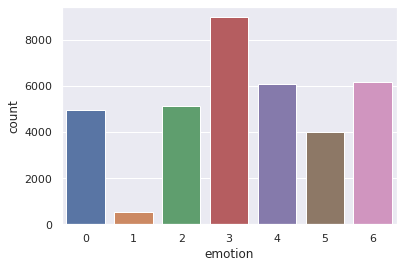

In [5]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion",data=data)

In [6]:

temp=[]
for i in x_data_train.index:
    temp.append(list(np.array(x_data_train[i].split(),dtype=np.float32)))
x_data_train = np.array(temp).reshape(-1,48,48,1)

temp=[]
for i in x_data_test.index:
    temp.append(list(np.array(x_data_test[i].split(),dtype=np.float32)))
x_data_test = np.array(temp).reshape(-1,48,48,1)

temp=[]
for i in range(x_data_os_train.shape[0]):
    temp.append(list(np.array(x_data_os_train[i][0].split(),dtype=np.float32)))
x_data_os_train = np.array(temp).reshape(-1,48,48,1)

temp=[]
for i in x_data_val.index:
    temp.append(list(np.array(x_data_val[i].split(),dtype=np.float32)))
x_data_val = np.array(temp).reshape(-1,48,48,1)


In [7]:
y_data_train = np.array(y_data_train)
y_data_train = y_data_train.reshape(y_data_train.shape[0], 1)
print(y_data_train.shape)
y_data_test = np.array(y_data_test)
y_data_test = y_data_test.reshape(y_data_test.shape[0], 1)
print(y_data_test.shape)
y_data_val = np.array(y_data_val)
y_data_val = y_data_val.reshape(y_data_val.shape[0], 1)
print(y_data_test.shape)
y_data_os_train = np.array(y_data_os_train)
y_data_os_train = y_data_os_train.reshape(y_data_os_train.shape[0], 1)
print(y_data_os_train.shape)


(28709, 1)
(3589, 1)
(3589, 1)
(50505, 1)


In [8]:

OS = True
if OS:
    X_train = x_data_train
    y_train = y_data_train
    X_test = x_data_test
    y_test = y_data_test
    X_val = x_data_val
    y_val = y_data_val
else:
    X_train = x_data_os_train
    y_train = y_data_os_train
    X_test = x_data_test
    y_test = y_data_test
    X_val = x_data_val
    y_val = y_data_val


In [9]:
y=y_train.reshape(28709,)

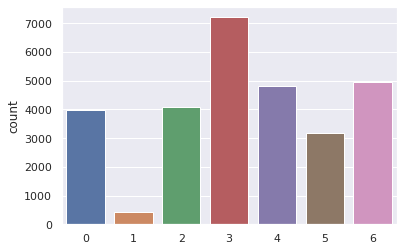

In [10]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=y)

In [11]:
X_train.shape

(28709, 48, 48, 1)

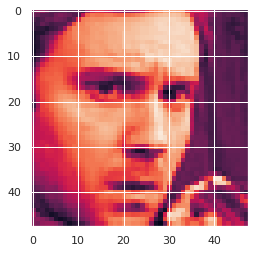

In [12]:
plt.imshow(X_train[0].reshape(48,48))

In [13]:
x_train=X_train.reshape(-1,2304)
x_val=X_val.reshape(-1,2304)
x_test=X_test.reshape(-1,2304)

In [14]:
s=StandardScaler().fit(x_train)

In [17]:
temp_train=s.transform(x_train)
temp_val=s.transform(x_val)
temp_test=s.transform(x_test)

In [18]:
from keras import regularizers

In [19]:
model = Sequential()

model.add(Conv2D(32, (3,3),input_shape=(48,48,1),activation='relu',padding='same'))
BatchNormalization(axis=3)

model.add(Conv2D(32, (3,3), kernel_regularizer=regularizers.L2(0.0001), activation='relu'))
BatchNormalization(axis=3)
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
BatchNormalization(axis=3)

model.add(Conv2D(64, (3,3), kernel_regularizer=regularizers.L2(0.0001), activation='relu'))
BatchNormalization(axis=3)
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
BatchNormalization(axis=3)
model.add(MaxPooling2D((2,2)))
model.add(GlobalAveragePooling2D())

#model.add(Flatten())

model.add(Dense(256, activation = 'relu'))  
BatchNormalization()
#model.add(Dropout(0.1))

model.add(Dense(256, activation = 'relu'))
BatchNormalization()
model.add(Dropout(0.1))

model.add(Dense(7, activation = 'softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 19, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                    

In [21]:
sgd = keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
y_train = np_utils.to_categorical(y_train)
print("shape of y_train is",y_train.shape)
y_test = np_utils.to_categorical(y_test)
print("shape of y_test is",y_test.shape)
y_val = np_utils.to_categorical(y_val)
print("shape of y_test is",y_test.shape)

(28709, 7)

In [ ]:
y_val[0]

In [26]:
X_train=temp_train.reshape(-1,48,48,1)
X_val=temp_val.reshape(-1,48,48,1)
X_test=temp_test.reshape(-1,48,48,1)

In [28]:
callback_list = [
                 #keras.callbacks.ModelCheckpoint("fer2013/model_with_oversampling_20_04_2022_1145.h5",monitor="val_accuracy",save_best_only=True),
                 keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5,restore_best_weights=True),
                 keras.callbacks.ReduceLROnPlateau(patience=5,fator=0.5)
]

history = model.fit(X_train, y_train, epochs = 50, validation_data=(X_val,y_val), callbacks=callback_list)

Epoch 1/30
898/898 [==============================] - 8s 9ms/step - loss: 0.9857 - accuracy: 0.6343 - val_loss: 1.3205 - val_accuracy: 0.5450 - lr: 0.0010
Epoch 2/30
898/898 [==============================] - 7s 8ms/step - loss: 0.9580 - accuracy: 0.6448 - val_loss: 1.3082 - val_accuracy: 0.5361 - lr: 0.0010
Epoch 3/30
898/898 [==============================] - 8s 8ms/step - loss: 0.9331 - accuracy: 0.6550 - val_loss: 1.4649 - val_accuracy: 0.5135 - lr: 0.0010
Epoch 4/30
898/898 [==============================] - 8s 8ms/step - loss: 0.9102 - accuracy: 0.6658 - val_loss: 1.2776 - val_accuracy: 0.5433 - lr: 0.0010
Epoch 5/30
898/898 [==============================] - 7s 8ms/step - loss: 0.8859 - accuracy: 0.6727 - val_loss: 1.3049 - val_accuracy: 0.5472 - lr: 0.0010
Epoch 6/30
898/898 [==============================] - 7s 8ms/step - loss: 0.8551 - accuracy: 0.6876 - val_loss: 1.3340 - val_accuracy: 0.5386 - lr: 0.0010
Epoch 7/30
898/898 [==============================] - 8s 8ms/step - lo

In [29]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

113/113 [==============================] - 1s 4ms/step - loss: 1.3806 - accuracy: 0.5770
Accuracy of our model on test data :  57.704097032547 %


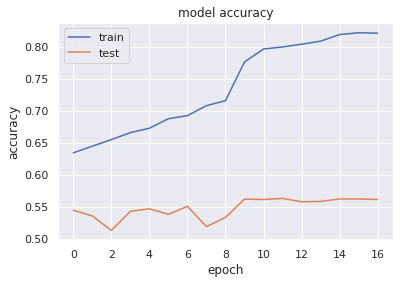

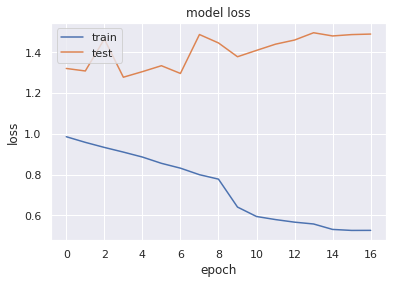

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
y_pred = model.predict(X_test)
y_result = []

for pred in y_pred:
    y_result.append(np.argmax(pred))
y_result[:10]

y_actual = []

for pred in y_test:
    y_actual.append(np.argmax(pred))
y_actual[:10]

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_result))

113/113 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.52      0.47      0.49       491
           1       0.65      0.27      0.38        55
           2       0.41      0.40      0.41       528
           3       0.75      0.79      0.77       879
           4       0.40      0.53      0.45       594
           5       0.76      0.71      0.73       416
           6       0.61      0.49      0.55       626

    accuracy                           0.58      3589
   macro avg       0.59      0.52      0.54      3589
weighted avg       0.59      0.58      0.58      3589



Text(66.5, 0.5, 'Truth')

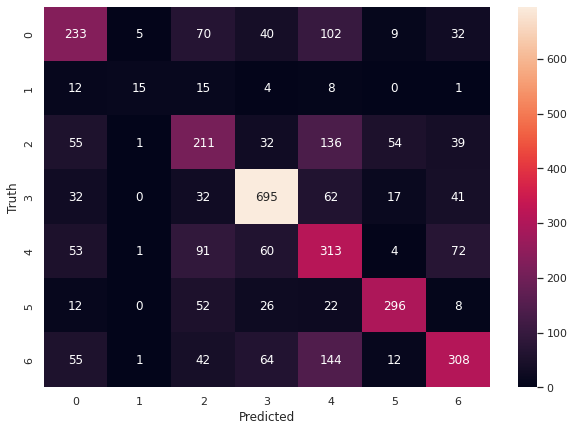

In [32]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
fer_json = model.to_json()  
with open("/content/drive/MyDrive/MLSP/MLSP_Project/fer2013/mymodel.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save("/content/drive/MyDrive/MLSP/MLSP_Project/fer2013/mymodel.h5") 

In [35]:
model_new = keras.models.load_model("/content/drive/MyDrive/MLSP/MLSP_Project/fer2013/mymodel.h5")

model_feat = Model(inputs=model_new.input,outputs=model_new.get_layer('dense').output)

feat_train = model_feat.predict(X_train)
print(feat_train.shape)

feat_test = model_feat.predict(X_test)
print(feat_test.shape)

In [34]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf',C=0.5)

print("Fitting SVM...")

svm.fit(feat_train,np.argmax(y_train,axis=1))

print('fitting done !!!')

Fitting SVM...
fitting done !!!


In [35]:
svm.score(feat_train,np.argmax(y_train,axis=1))

0.6847678428367411

In [36]:
svm.score(feat_test,np.argmax(y_test,axis=1))

0.5709111173028699

In [37]:
from xgboost import XGBClassifier

In [38]:
xgb = XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators=100)

In [39]:
xgb.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')
print("Train:",xgb.score(feat_train,np.argmax(y_train,axis=1)))
print("Test:",xgb.score(feat_test,np.argmax(y_test,axis=1)))

fitting done !!!
Train: 0.9985022118499425
Test: 0.583170799665645


In [40]:
print("Accuracy of our model on validation data : " , model_new.evaluate(X_test,y_test)[1]*100 , "%")

113/113 [==============================] - 1s 4ms/step - loss: 1.2227 - accuracy: 0.5433
Accuracy of our model on validation data :  54.332685470581055 %


In [36]:
model_feat_last = Model(inputs=model_new.input,outputs=model_new.get_layer('dense_2').output)  #probablity output of last layer
feat_test_last = model_feat_last.predict(X_test)

113/113 [==============================] - 1s 3ms/step


In [38]:
#softclass prediction
pred_g=[] #will contain emotion label prediction which are garunteed by our threshold probablity
index_g=[]  #will contain index of that samples 

pred_c=[]   ##will contain emotion label prediction which are confused by our model probablity less than threshold
index_c=[]   #will contain index of that samples 

index_nan=[]

for i in range(len(feat_test_last)):
    o=feat_test_last[i]
    if max(o)>0.55:
        pred=np.argmax(o)
        index_g.append(i)
        pred_g.append(pred)
    else:
        if max(o)>0.35:
            pred1=np.argmax(o);
            o_1=np.delete(o,pred1)
            max2=max(o_1)
            pred2=np.where(o==max2)[0][0]
            index_c.append(i)
            pred_c.append([pred1,pred2])
        else:
            index_nan.append(i)

In [42]:
t_sure=y_test[index_g]
t_conf=y_test[index_c]
t_nan=y_test[index_nan]

In [48]:
print(classification_report(np.argmax(t_sure,axis=1), pred_g))

              precision    recall  f1-score   support

           0       0.62      0.53      0.57       330
           1       0.69      0.30      0.42        30
           2       0.50      0.41      0.45       359
           3       0.80      0.85      0.83       770
           4       0.43      0.57      0.49       392
           5       0.80      0.81      0.81       349
           6       0.66      0.58      0.62       437

    accuracy                           0.66      2667
   macro avg       0.64      0.58      0.60      2667
weighted avg       0.66      0.66      0.65      2667



Text(66.5, 0.5, 'Truth')

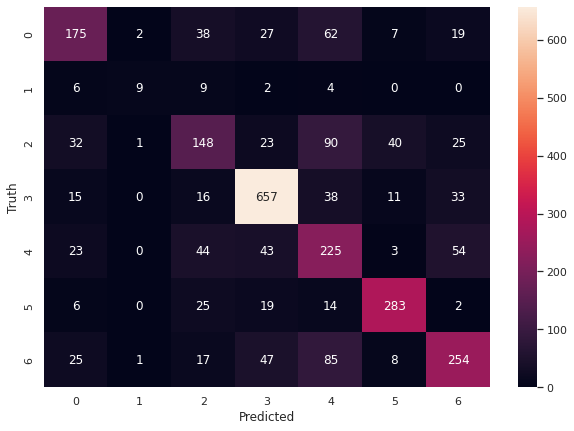

In [49]:
cm = tf.math.confusion_matrix(labels = np.argmax(t_sure,axis=1), predictions = pred_g)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
def accuracy(pred,real):
    acc=0
    for i in range(len(real)):
        o=real[i]
        p=pred[i]
        if (p==o).any():
            acc+=1
    return(acc/len(real))

In [51]:
score=accuracy(pred_c,np.argmax(t_conf,axis=1))

In [52]:
score

0.6193390452876377

In [53]:
print("Accuracy of our model on data for which softclass predicts dont know : " , model_new.evaluate(X_test[index_nan],t_nan)[1]*100 , "%")

4/4 [==============================] - 0s 49ms/step - loss: 1.7912 - accuracy: 0.2762
Accuracy of our model on data for which softclass predicts dont know :  27.619048953056335 %
